<center><h1>Spam detection using RNN</h1></center>

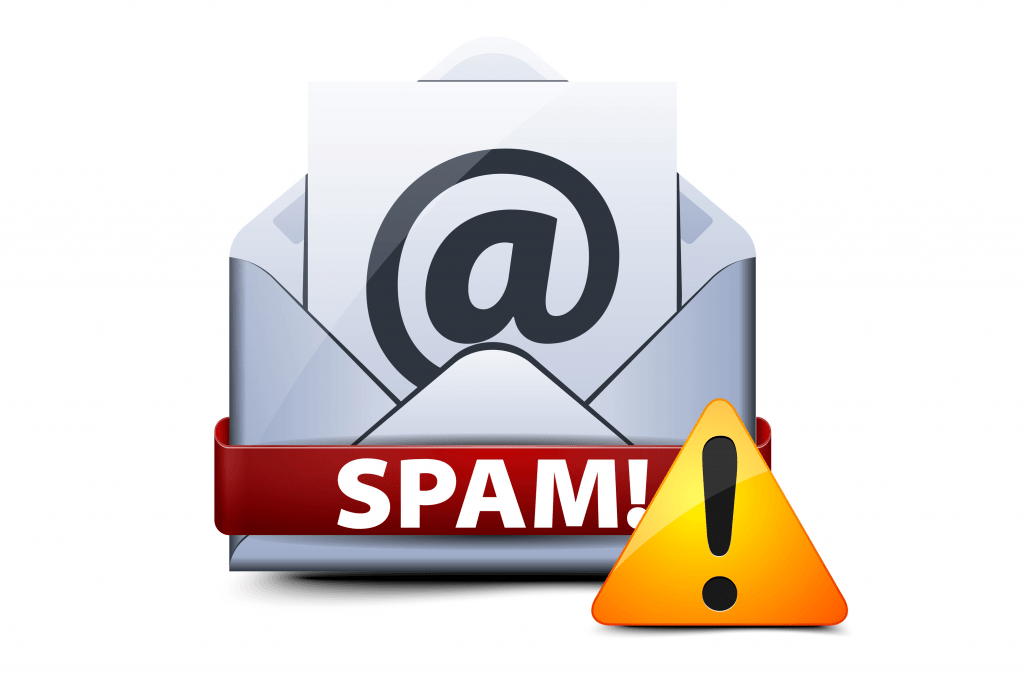

### About Dataset
**Context**

    The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

**Content**

    The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.
    This corpus has been collected from free or free for research sources at the Internet:
    - A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: 
    http://www.grumbletext.co.uk/.
    - A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at:
    https://etheses.bham.ac.uk/id/eprint/253/1/Tagg09PhD.pdf.
    - Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

## Libraries

In [6]:
# Libraries for Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Libraries for Preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Libraries for Models
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

## Body

In [30]:
# Load dataset
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [31]:
# Detecting null values
df.isnull().mean()

v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

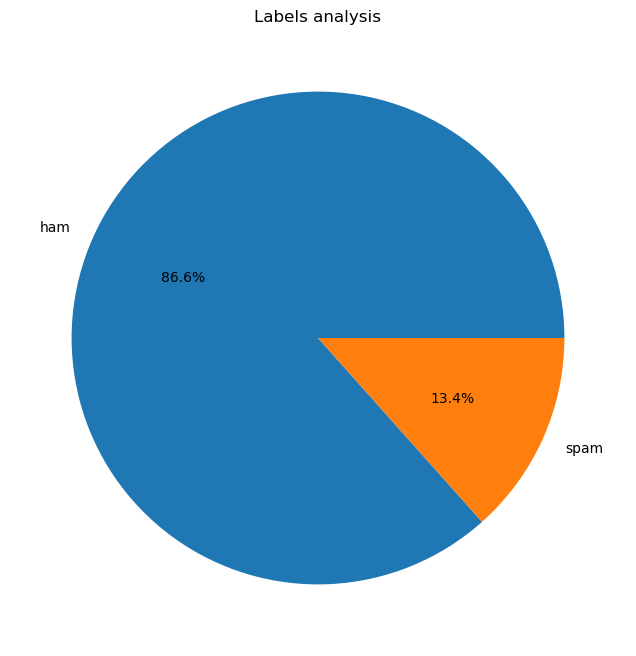

In [94]:
# Observation labels
plt.figure(figsize=(8,8))
plt.pie(df["labels"].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.title('Labels analysis')
plt.show()

In [32]:
# Removing unnecessary features
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1,inplace= True)

# Renaming the columns
df.columns = ['labels', 'data']
print(f"the shape of datatset : {df.shape}")

the shape of datatset : (5572, 2)


In [38]:
# create binary labels
binary_map = {'ham': 0, 'spam': 1}
df.b_labels = df.labels.map(binary_map)

# split up the data
X_train, X_test, y_train, y_test = train_test_split(
    df.data,
    df.b_labels, 
    test_size = 0.3
)

print(f"X_train shape : {X_train.shape}\nX_test shape : {X_test.shape}")

X_train shape : (3900,)
X_test shape : (1672,)


In [47]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)

# Sequenceses
s_train = tokenizer.texts_to_sequences(X_train)
s_test = tokenizer.texts_to_sequences(X_test)

In [56]:
# get word -> integer mapping
idx = tokenizer.word_index
vocab_size = len(word2idx)
print('Found %s unique tokens. ' % V)

Found 7230 unique tokens. 


In [57]:
df_train = pad_sequences(s_train)
print('Shape of data train tensor: ', df_train.shape)
total_len = data_train.shape[1]

df_test = pad_sequences(s_test, maxlen = total_len)
print('Shape of data test tensor: ', df_test.shape)

Shape of data train tensor:  (3900, 162)
Shape of data test tensor:  (1672, 162)


In [58]:
# Define the hyperparameters
embedding_dim = 20
hidden_dim = 15  

# Define the input layer
input_seq = Input(shape=(total_len,))

# Create the embedding layer
embedding_layer = Embedding(vocab_size + 1, embedding_dim)(input_seq)

# Add the LSTM layer with return_sequences=True to get sequences as output
lstm_layer = LSTM(hidden_dim, return_sequences=True)(embedding_layer)

# Apply global max pooling to reduce the sequence dimension
pooling_layer = GlobalMaxPooling1D()(lstm_layer)

# Add a dense layer with sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(pooling_layer)

# Create the model
model = Model(input_seq, output)

In [61]:
# Compile and fit the model
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


print('Training model...')
history = model.fit(
    df_train,
    y_train,
    epochs = 10,
    validation_data = (df_test, y_test)
)

Training model...
Epoch 1/10


2023-07-05 22:03:27.830850: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


122/122 [==============================] - 4s 27ms/step - loss: 0.4636 - accuracy: 0.8608 - val_loss: 0.4123 - val_accuracy: 0.8559
Epoch 2/10
122/122 [==============================] - 3s 27ms/step - loss: 0.3856 - accuracy: 0.8703 - val_loss: 0.4116 - val_accuracy: 0.8559
Epoch 3/10
122/122 [==============================] - 3s 27ms/step - loss: 0.3845 - accuracy: 0.8703 - val_loss: 0.4104 - val_accuracy: 0.8559
Epoch 4/10
122/122 [==============================] - 3s 27ms/step - loss: 0.3805 - accuracy: 0.8703 - val_loss: 0.4032 - val_accuracy: 0.8559
Epoch 5/10
122/122 [==============================] - 3s 27ms/step - loss: 0.3633 - accuracy: 0.8703 - val_loss: 0.3627 - val_accuracy: 0.8559
Epoch 6/10
122/122 [==============================] - 3s 27ms/step - loss: 0.2116 - accuracy: 0.9192 - val_loss: 0.1332 - val_accuracy: 0.9701
Epoch 7/10
122/122 [==============================] - 3s 27ms/step - loss: 0.0620 - accuracy: 0.9923 - val_loss: 0.0803 - val_accuracy: 0.9827
Epoch 8/10

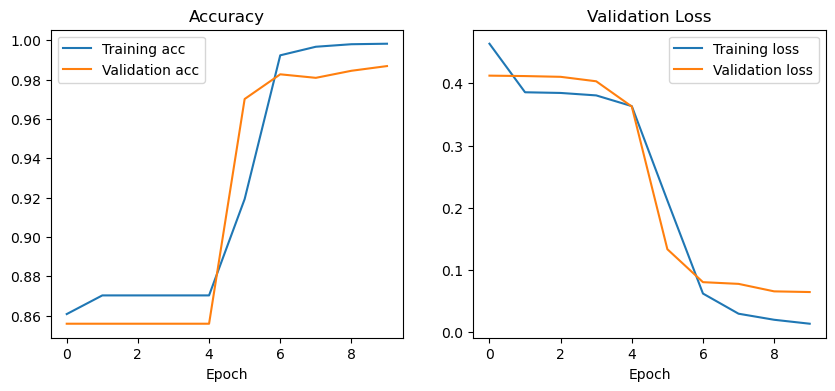

In [73]:
# Evaluating plots
fig, axs = plt.subplots(1, 2,figsize=(10,4))

# Get the length of the data
history_len = len(history.history['accuracy'])

# Create a dictionary to store the plots, labels and titles
plots = {
    'acc':['accuracy','val_accuracy','Accuracy'],
    'loss':['loss','val_loss','Validation Loss'],
}

# Iterate over the dictionary and plot the data
for i, (key,value) in enumerate(plots.items()):
    # Plot the training and validation data
    axs[i].plot(range(history_len), history.history[value[0]],label = f'Training {key}')
    axs[i].plot(range(history_len), history.history[value[1]],label = f'Validation {key}')
    # Add the legend
    axs[i].legend()
    # Set the title
    axs[i].set_title(value[2])
    # Set the x-axis label
    axs[i].set_xlabel('Epoch')
# Show the plot
plt.show()